#SMA Percent Band

    1. The SPY is closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize period)

In [33]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [34]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [35]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# Double the DPI, so we are making 2x plots:
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

Some global data

In [36]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define the periods

In [37]:
periods = range(50, 525, 25)
periods = [str(period) for period in periods]

Run Strategy

In [38]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, sma_period=int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].stats()

50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 

Summarize results

In [39]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
annual_return_rate,6.55,6.60,6.37,6.86,7.39,7.86,7.51,7.84,7.58,7.27,7.00,7.21,7.11,7.25,6.85,6.23,5.86,6.05,5.76
max_closed_out_drawdown,-39.52,-37.82,-50.60,-45.23,-38.18,-32.79,-28.26,-25.25,-21.64,-23.85,-35.43,-35.66,-36.46,-35.37,-36.47,-39.90,-43.89,-43.38,-42.93
drawdown_annualized_return,-6.03,-5.73,-7.94,-6.60,-5.17,-4.17,-3.76,-3.22,-2.86,-3.28,-5.06,-4.95,-5.13,-4.88,-5.33,-6.40,-7.50,-7.17,-7.45
drawdown_recovery,-9.88,-3.91,-3.93,-3.75,-3.75,-3.75,-3.76,-1.02,-0.30,-0.21,-1.24,-1.22,-1.27,-1.31,-1.36,-1.36,-1.36,-1.36,-1.36
best_month,15.18,15.17,15.18,14.92,14.92,14.92,13.42,13.41,13.40,13.40,13.40,14.53,14.54,14.55,15.87,15.87,18.16,18.15,18.16
worst_month,-15.40,-12.67,-12.69,-12.69,-11.80,-10.77,-11.96,-15.03,-14.22,-14.55,-31.46,-31.46,-31.45,-31.45,-31.45,-31.47,-31.44,-31.46,-31.42
sharpe_ratio,0.70,0.70,0.68,0.72,0.76,0.80,0.77,0.79,0.76,0.73,0.68,0.69,0.68,0.69,0.65,0.60,0.56,0.58,0.55
sortino_ratio,0.76,0.77,0.74,0.80,0.86,0.91,0.88,0.91,0.88,0.84,0.73,0.75,0.74,0.76,0.72,0.66,0.62,0.64,0.61
monthly_std,2.81,2.84,2.90,2.92,2.91,2.87,2.89,2.95,2.99,3.02,3.19,3.17,3.19,3.19,3.18,3.23,3.30,3.29,3.32
pct_time_in_market,66.53,67.72,68.43,69.23,69.77,70.21,71.12,72.03,72.62,73.16,73.59,73.96,74.33,74.85,75.47,75.97,76.37,76.89,77.41


Bar graphs

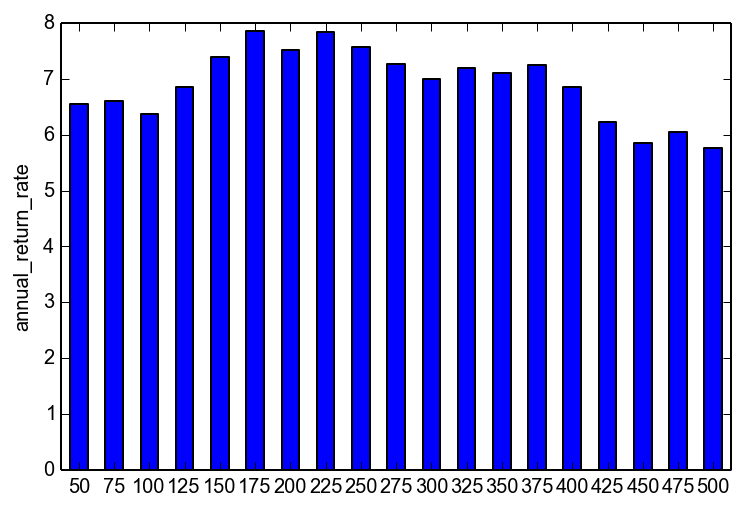

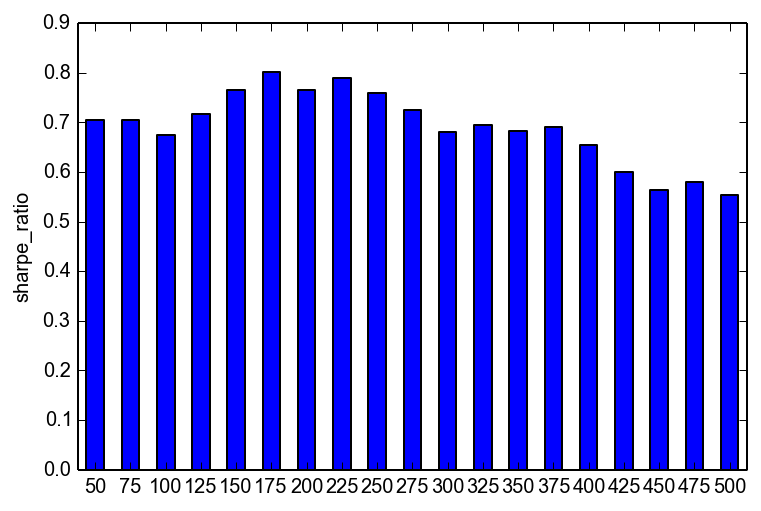

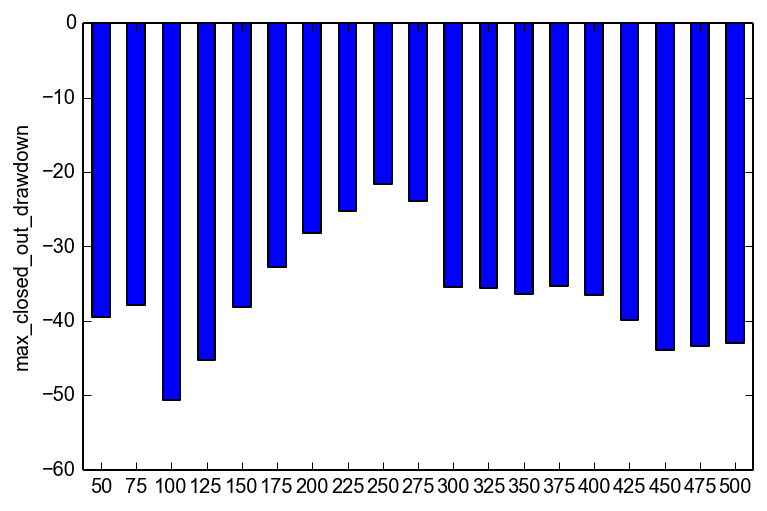

In [40]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [41]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1950-03-15 00:00:00 BUY  573 ^GSPC @ 17.45
2015-05-29 00:00:00 SELL 573.0 ^GSPC @ 2107.39


Equity curve

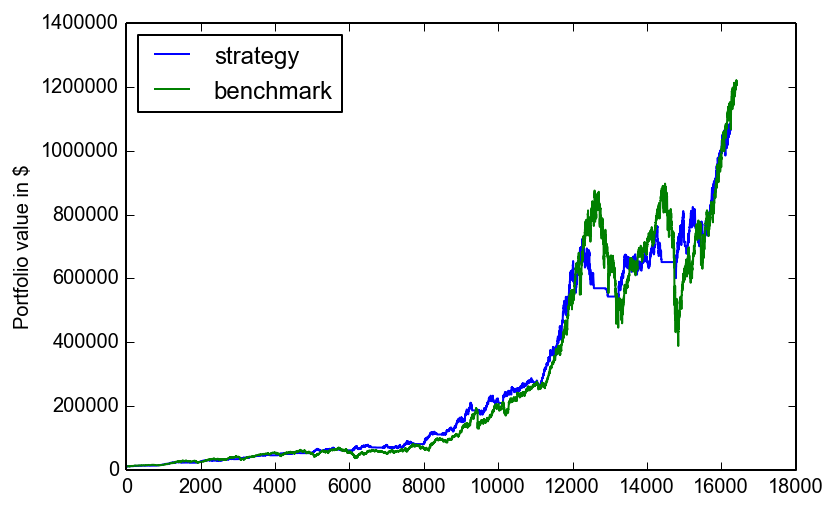

In [42]:
pf.plot_equity_curve(strategies['200'].dbal, benchmark=benchmark.dbal)